In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('EastWestAirlinesNN.csv')
#dataset=pd.read_csv('/content/sample_data/EastWestAirlinesNN.csv')

In [ ]:
dataset

**DATA CLEANING**

In [ ]:
dataset=dataset.drop(columns=['ID#'])

In [ ]:
about=dataset.isna().sum()

In [ ]:
about.to_csv('/content/sample_data/aboutNa.csv')

In [ ]:
indexNames = dataset[ dataset['Topflight'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Balance'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Qual_miles'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['cc1_miles?'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['cc2_miles?'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['cc3_miles?'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Bonus_miles'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Bonus_trans'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Flight_miles_12mo'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Flight_trans_12'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Online_12'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Email'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Club_member'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Any_cc_miles_12mo'].isna() ].index
dataset.drop(indexNames , inplace=True)
indexNames = dataset[ dataset['Phone_sale'].isna() ].index
dataset.drop(indexNames , inplace=True)


In [ ]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['Topflight'],prefix='Topflight')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['cc1_miles?'],prefix='cc1_miles?')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['cc2_miles?'],prefix='cc2_miles?')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['cc3_miles?'],prefix='cc3_miles?')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['Email'],prefix='Email')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['Club_member'],prefix='Club_member')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['Any_cc_miles_12mo'],prefix='Any_cc_miles_12mo')],axis=1)

In [ ]:
dataset=dataset.drop(columns=['Topflight'])
dataset=dataset.drop(columns=['cc1_miles?'])
dataset=dataset.drop(columns=['cc2_miles?'])
dataset=dataset.drop(columns=['cc3_miles?'])

dataset=dataset.drop(columns=['Email'])
dataset=dataset.drop(columns=['Club_member'])
dataset=dataset.drop(columns=['Any_cc_miles_12mo'])


In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
train_labels=train_dataset.pop('Phone_sale')
test_labels=test_dataset.pop('Phone_sale')

In [ ]:
train_stats=train_dataset.describe()

In [ ]:
train_dataset

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Topflight_0.0,Topflight_1.0,cc1_miles?_0.0,cc1_miles?_1.0,cc2_miles?_0.0,cc2_miles?_1.0,cc3_miles?_0.0,cc3_miles?_1.0,Email_0.0,Email_1.0,Club_member_0.0,Club_member_1.0,Any_cc_miles_12mo_0.0,Any_cc_miles_12mo_1.0
1275,39601.0,0.0,4066.0,12.0,0.0,0.0,0.0,1,0,0,1,1,0,1,0,0,1,1,0,0,1
3580,7625.0,0.0,4375.0,21.0,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
4368,172570.0,0.0,12022.0,10.0,250.0,2.0,0.0,0,1,1,0,1,0,1,0,0,1,1,0,1,0
376,22380.0,0.0,300.0,2.0,200.0,1.0,0.0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
3807,126028.0,0.0,23974.0,19.0,668.0,1.0,0.0,0,1,0,1,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,28677.0,0.0,215.0,3.0,0.0,0.0,0.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
56,75971.0,0.0,34339.0,14.0,0.0,0.0,0.0,1,0,0,1,1,0,1,0,0,1,1,0,0,1
3300,6789.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
1435,32749.0,0.0,450.0,3.0,450.0,3.0,0.0,1,0,1,0,1,0,1,0,0,1,1,0,1,0


In [ ]:
train_stats

In [ ]:

train_stats=train_stats.transpose()

In [ ]:
def normalize(data):
     return (data-train_stats['mean'])/train_stats['std']

In [ ]:
train_dataset=normalize(train_dataset)
test_dataset=normalize(test_dataset)

**Build A Deep Neural Network**

In [ ]:
model=tf.keras.models.Sequential([
                               
                              tf.keras.layers.Dense(21, activation='relu', input_shape=[len(train_dataset.keys())]),
                              tf.keras.layers.Dense(5, activation='relu'),
                              tf.keras.layers.Dense(1,activation='sigmoid')
])



model.compile(loss='mse',
                optimizer='rmsprop',metrics=['acc'])

In [ ]:
history=model.fit(train_dataset,train_labels,batch_size=128, verbose=1,validation_split=0.2,epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2091 - acc: 0.8000 - val_loss: 0.1853 - val_acc: 0.8559
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1636 - acc: 0.8724 - val_loss: 0.1518 - val_acc: 0.8546
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1349 - acc: 0.8721 - val_loss: 0.1328 - val_acc: 0.8546
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1193 - acc: 0.8721 - val_loss: 0.1245 - val_acc: 0.8546
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1126 - acc: 0.8721 - val_loss: 0.1215 - val_acc: 0.8546
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1102 - acc: 0.8721 - val_loss: 0.1203 - val_acc: 0.8546
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1092 - acc: 0.8721 - val_loss: 0.1198 - val_acc: 0.8546
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1087 - acc: 0.87

In [ ]:
test_predict=model.predict(test_dataset,batch_size=1).flatten()

In [ ]:
model.evaluate(test_dataset,test_labels)

32/32 [==============================] - 0s 2ms/step - loss: 0.1155 - acc: 0.8656


[0.11552387475967407, 0.8655967712402344]

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

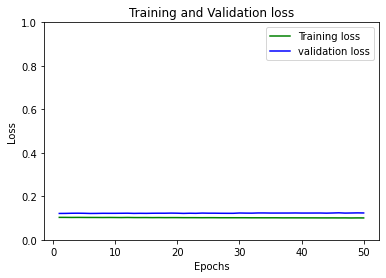

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

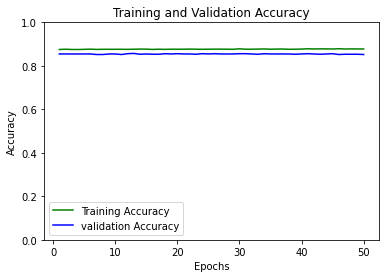

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,51)
plt.plot(epochs, train_acc , 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.legend()
plt.show()

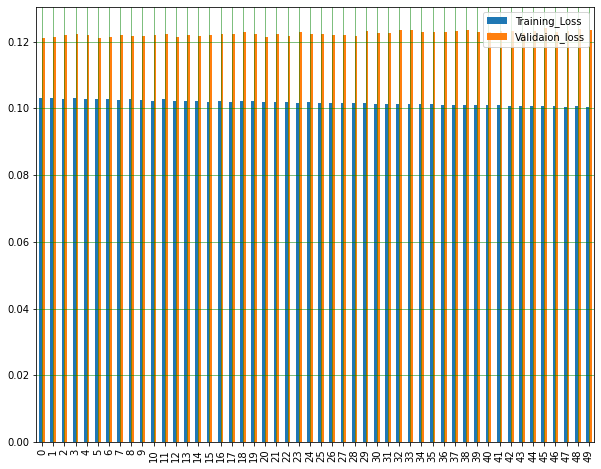

In [ ]:
df = pd.DataFrame({'Training_Loss':  history.history['loss'], 'Validaion_loss':  history.history['val_loss']})

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

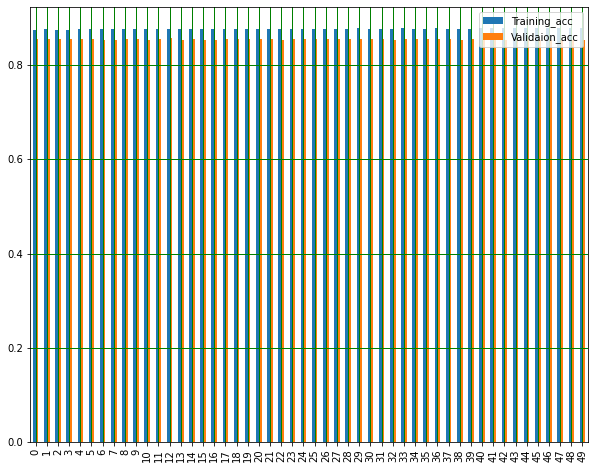

In [ ]:
df = pd.DataFrame({'Training_acc':  history.history['acc'], 'Validaion_acc':  history.history['val_acc']})

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

**B)**

Above training and validation Chart shows that there are some overfitting problem because the Training Accuracy is 87% and validation accuracy is 85%.